In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest



sns.set_style('whitegrid')

import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,5)})

if not "root" in locals():
    current_path = Path(os.getcwd())
    root = current_path.parent.absolute()
os.chdir(root)

from tools.add_AR_cols import add_AR_cols
from data_treatment.box_creator import create_binary_box
PATH = "../"

In [2]:
df = pd.read_csv('database.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = create_binary_box(df, relative_threshold = 0.05, box_length=5).set_index(['Date']).dropna(axis = 0)
df[['PX_OPEN_VIX_volatility','Box']]
df = add_AR_cols(df,7)

In [3]:
y = df['Box']
X = df.drop(['Box', 'Neutral_SENTIMENT', 'Bull-Bear Spread_SENTIMENT'], axis=1)
X = (X - X.mean())/X.std()

In [4]:
selec_model = SelectKBest(k=40)
selec_model.fit(X, y)
selected_cols = selec_model.get_feature_names_out()

X= X[selected_cols]

In [5]:
coeffs_list =[]
l_s = np.linspace(0.3,0,600)

lasso = LogisticRegression(C=l_s[0], fit_intercept=True, penalty='l1', solver='saga', max_iter = 4000)
lasso.fit(X,y)
coeffs_list.append(lasso.coef_[0])

X =X [np.array(X.columns)[coeffs_list[0]!=0]]


tab_coeff = np.empty([len(l_s)-1,len(X.columns)])

l_s = l_s[1:]

for i in range(len(l_s)):
    lasso = LogisticRegression(C=l_s[i], fit_intercept=True, penalty='l1', solver='saga', max_iter = 4000)
    lasso.fit(X,y)
    tab_coeff[i,:]= lasso.coef_[0]

0.2994991652754591
0.2989983305509182
0.2984974958263773
0.29799666110183637
0.2974958263772955
0.29699499165275456
0.2964941569282137
0.2959933222036728
0.29549248747913187
0.294991652754591
0.29449081803005006
0.2939899833055092
0.29348914858096825
0.2929883138564274
0.29248747913188644
0.29198664440734556
0.2914858096828047
0.29098497495826375
0.2904841402337229
0.28998330550918194
0.28948247078464107
0.28898163606010013
0.28848080133555926
0.2879799666110184
0.28747913188647745
0.28697829716193657
0.28647746243739564
0.28597662771285476
0.2854757929883138
0.28497495826377295
0.28447412353923207
0.28397328881469114
0.28347245409015026
0.28297161936560933
0.28247078464106845
0.2819699499165275
0.28146911519198664
0.2809682804674457
0.28046744574290483
0.27996661101836395
0.279465776293823
0.27896494156928214
0.2784641068447412
0.27796327212020033
0.2774624373956594
0.2769616026711185
0.2764607679465776
0.2759599332220367
0.27545909849749584
0.2749582637729549
0.274457429048414
0.2739

/Users/thomaskientz/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:856: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1.0 / C


In [8]:
coeff_df = pd.DataFrame(data=tab_coeff[::-1], index=l_s[::-1], columns=X.columns)
coeff_df["Valid cols"] = coeff_df[coeff_df!=0].count(axis=1)

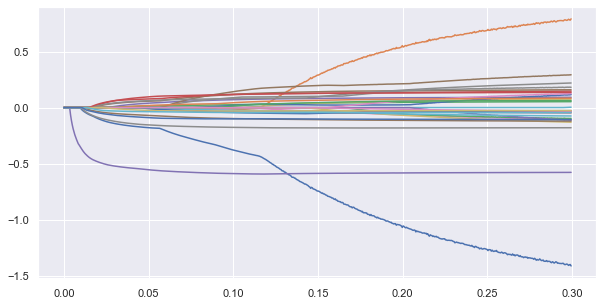

In [9]:
plot = coeff_df.drop("Valid cols", axis=1).plot(legend= False)
plt.show()

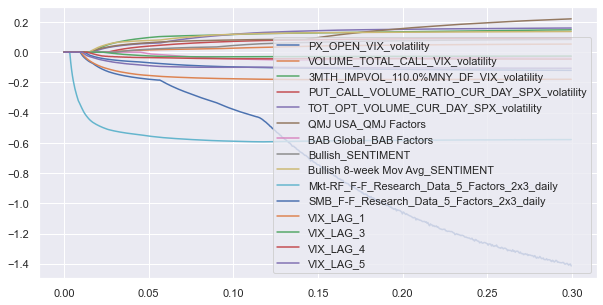

In [10]:
first_cols = coeff_df[coeff_df['Valid cols']==15][coeff_df!=0].dropna(axis=1).columns

plot = coeff_df[first_cols].drop("Valid cols", axis=1).plot()
plt.show()

In [11]:
plot = coeff_df[first_cols].drop("Valid cols", axis=1)
plot.index.name = "L"

In [12]:
#!pip install plotly
import plotly.express as px
fig = px.line(plot, x=plot.index, y=plot.columns)
with open("analysis/lasso_selection_graph.html", "w") as f:
    f.write(fig.to_html())

In [11]:
df = pd.read_csv('database.csv')
df

,Date,PX_OPEN_VIX_volatility,PX_HIGH_VIX_volatility,PX_LOW_VIX_volatility,PX_LAST_VIX_volatility,VOLUME_TOTAL_CALL_VIX_volatility,PUT_CALL_VOLUME_RATIO_CUR_DAY_VIX_volatility,VOLUME_TOTAL_PUT_VIX_volatility,TOT_OPT_VOLUME_CUR_DAY_VIX_volatility,OPEN_INT_TOTAL_CALL_VIX_volatility,...,S&P 500 Weekly Low_SENTIMENT,S&P 500 Weekly Close_SENTIMENT,ST_Rev_F-F_ST_Reversal_Factor_daily,Mkt-RF_F-F_Research_Data_5_Factors_2x3_daily,SMB_F-F_Research_Data_5_Factors_2x3_daily,HML_F-F_Research_Data_5_Factors_2x3_daily,RMW_F-F_Research_Data_5_Factors_2x3_daily,CMA_F-F_Research_Data_5_Factors_2x3_daily,RF_F-F_Research_Data_5_Factors_2x3_daily,Mom _F-F_Momentum_Factor_daily
0,2000-01-03,24.36,26.15,23.98,24.21,NaN,NaN,NaN,NaN,NaN,...,1450.83,1469.25,0.69,-0.71,-0.06,-1.42,-1.50,-0.63,0.021,-0.08
1,2000-01-04,24.94,27.18,24.80,27.01,NaN,NaN,NaN,NaN,NaN,...,1450.83,1469.25,1.62,-4.06,0.33,2.07,0.47,1.45,0.021,-1.91
2,2000-01-05,27.98,29.00,25.85,26.41,NaN,NaN,NaN,NaN,NaN,...,1450.83,1469.25,1.11,-0.09,0.33,0.16,0.41,1.11,0.021,-0.49
3,2000-01-06,26.68,26.71,24.70,25.73,NaN,NaN,NaN,NaN,NaN,...,1377.68,1441.47,0.76,-0.73,-0.05,1.26,0.65,1.22,0.021,-1.49
4,2000-01-07,25.14,25.17,21.72,21.72,NaN,NaN,NaN,NaN,NaN,...,1377.68,1441.47,-0.72,3.21,-0.94,-1.43,-0.88,-0.95,0.021,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5377,2021-05-18,18.89,21.45,18.81,21.34,435445.0,0.8205,357293.0,792738.0,6190495.0,...,4056.88,4063.04,1.13,-0.69,0.06,-0.93,-1.01,-0.42,0.000,-0.26
5378,2021-05-19,22.46,25.96,21.88,22.18,417537.0,1.2020,501893.0,919430.0,4725251.0,...,4056.88,4063.04,1.02,-0.34,-0.49,-0.46,-0.18,-0.34,0.000,-0.70
5379,2021-05-20,22.33,23.50,20.19,20.67,208977.0,0.8944,186913.0,395890.0,4842985.0,...,4121.97,4137.60,1.24,1.15,-0.47,-1.43,-0.84,-0.49,0.000,0.20
5380,2021-05-21,20.42,20.89,19.53,20.15,127120.0,1.3804,175475.0,302595.0,4884139.0,...,4121.97,4137.60,-0.76,-0.04,0.44,0.98,-0.12,-0.06,0.000,0.25


<AxesSubplot:xlabel='Date'>

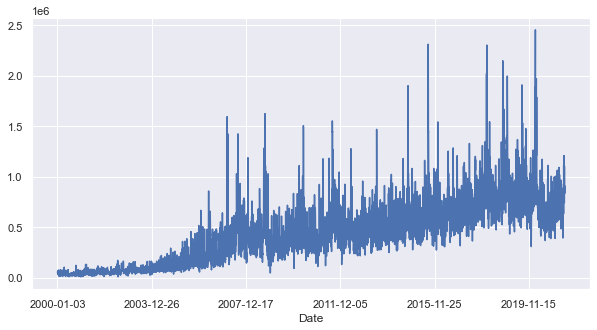

In [16]:
df.set_index("Date")["VOLUME_TOTAL_PUT_SPX_volatility"].plot()

<AxesSubplot:xlabel='Date'>

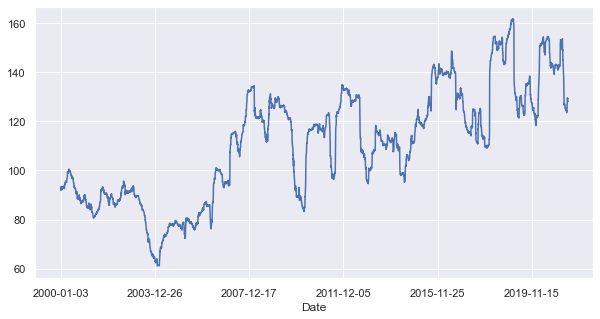

In [18]:
df.set_index("Date")['VOLATILITY_260D_VIX_volatility'].plot()